# 1. Numerical Integration

Problem 1

In [11]:
def approxIntegral(g, a, b, N, method = 'Simpsons'):
    integ = 0
    step = (b-a)/N
    a_k = a
    b_k = a + step
    
    # midpoint
    if method == 'midpoint':
        for i in range(N):
            integ += (g((a_k+b_k)/2))*step
            a_k = b_k
            b_k = a_k + step
            
    # trapezoid
    elif method == 'trapezoid':
        for i in range(N):
            integ += ((g(a_k)+g(b_k))/2)*step
            a_k = b_k
            b_k = a_k + step
            
    # simpsons
    elif method == 'Simpsons':
        for i in range(N):
            integ += (g(a_k)+g(b_k)+4*g((a_k+b_k)/2))*(step/6)
            a_k = b_k
            b_k = a_k + step
    else:
        print("Incorrect input for argument 'method'")
      
    return integ


g = lambda x: (0.1 * x**4 - 1.5 * x**3 + 0.53 * x**2 + 2 * x + 1)
a, b= -10, 10
N = 10000

exactval = float(13120/3)

print("Method: Midpoint")
midpoint = approxIntegral(g,a,b,N,'midpoint')
print(midpoint)
print("Difference: " + str(abs(midpoint - exactval)))
print('\n')

print("Method: Trapezoid")
trapezoid= approxIntegral(g,a,b,N,'trapezoid')
print(trapezoid)
print("Difference: " + str(abs(trapezoid - exactval)))
print('\n')

print("Method: Simpsons")
simpsons = approxIntegral(g,a,b,N,'Simpsons')
print(simpsons)
print("Difference: " + str(abs(simpsons - exactval)))

Method: Midpoint
4373.333196465914
Difference: 0.00013686741931451252


Method: Trapezoid
4373.333607065874
Difference: 0.00027373254124540836


Method: Simpsons
4373.333333332548
Difference: 7.848939276300371e-10


The Simpsons method seems to be the most accurate.

Problem 2

Weights:
[ 0.00346697  0.01439745  0.04894278  0.11725292  0.19802845  0.23582284
  0.19802845  0.11725292  0.04894278  0.01439745  0.00346697]
Nodes:
[-3.  -2.4 -1.8 -1.2 -0.6  0.   0.6  1.2  1.8  2.4  3. ]


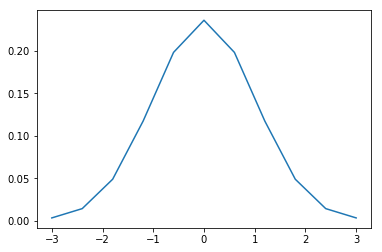

In [20]:
from matplotlib import pyplot as plt

import scipy.stats
import numpy as np

def approxNormal(mu, sigma, N, k):
    Z = np.zeros(N)
    omega = np.zeros(N)
    a = mu - sigma * k
    step = (2 * sigma * k)/(N - 1)
    for i in range(N):
        Z[i] = a + i * step
        
    omega[0] = scipy.stats.norm.cdf(((((Z[0]+Z[1])/2) - mu))/sigma)
    
    for i in range(1, N - 1):
        omega[i] = scipy.stats.norm.cdf(((((Z[i]+Z[i+1])/2) - mu))/sigma) - \
        scipy.stats.norm.cdf(((((Z[i-1]+Z[i])/2) - mu))/sigma)
        
    omega[N-1] = 1 - scipy.stats.norm.cdf(((((Z[N-2]+Z[N-1])/2) - mu))/sigma)
    
    return Z, omega

Z, omega = approxNormal(0,1,11,3)
print('Weights:')
print(omega)
print('Nodes:')
print(Z)


plt.plot(Z, omega)
plt.show()


In [ ]:
Problem 3

Weights:
[ 0.00346697  0.01439745  0.04894278  0.11725292  0.19802845  0.23582284
  0.19802845  0.11725292  0.04894278  0.01439745  0.00346697]
Nodes:
[  0.04978707   0.09071795   0.16529889   0.30119421   0.54881164   1.
   1.8221188    3.32011692   6.04964746  11.02317638  20.08553692]


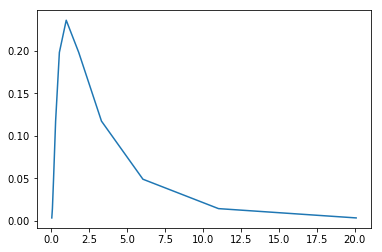

In [24]:
def approxLogNormal(mu, sigma, N, k):
    Z, omega = approxNormal(mu, sigma, N, k)
    Z = np.exp(Z)
    return Z, omega
    
Z, omega = approxLogNormal(0,1,11,3)
print('Weights:')
print(omega)
print('Nodes:')
print(Z)

plt.plot(Z,omega)
plt.show()

In [ ]:
Problem 4

In [33]:
mu, sigma = 10.5, 0.8
Z, omega = approxLogNormal(mu,sigma,11,3)

mean = sum(omega[i]*Z[i] for i in range(len(Z)))
print("Approximate mean:")
print(mean)
print("Actual lognormal mean:")
print(np.exp(mu + (sigma**2)/2))

Approximate mean:
50352.4561928
Actual lognormal mean:
50011.0870085


Of course, the approximation gets better as the grid is more refined:

In [42]:
mu, sigma = 10.5, 0.8
Z, omega = approxLogNormal(mu,sigma,500,7)

mean = sum(omega[i]*Z[i] for i in range(len(Z)))
print("Approximate mean:")
print(mean)
print("Actual lognormal mean:")
print(np.exp(mu + (sigma**2)/2))

Approximate mean:
50012.1367736
Actual lognormal mean:
50011.0870085


Problem 5

In [57]:
import scipy.optimize as opt

def eqs(wx):
    om_1, om_2, om_3, x_1, x_2, x_3 = wx
    
    eq_0 = (b - a) - (om_1 + om_2 + om_3)
    
    eq_1 = ((1/2) * b ** 2 - (1/2) * a ** 2) - \
    (om_1 * x_1 + om_2 * x_2 + om_3 * x_3)
    
    eq_2 = ((1/3) * b ** 3 - (1/3) * a ** 3) - \
    (om_1 * x_1 ** 2 + om_2 * x_2 ** 2 + om_3 * x_3 ** 2)
    
    eq_3 = ((1/4) * b ** 4 - (1/4) * a ** 4) - \
    (om_1 * x_1 ** 3 + om_2 * x_2 ** 3 + om_3 * x_3 ** 3)
    
    eq_4 = ((1/5) * b ** 5 - (1/5) * a ** 5) - \
    (om_1 * x_1 ** 4 + om_2 * x_2 ** 4 + om_3 * x_3 ** 4)
    
    eq_5 = ((1/6) * b ** 6 - (1/6) * a ** 6) - \
    (om_1 * x_1 ** 5 + om_2 * x_2 ** 5 + om_3 * x_3 ** 5)
    
    return (eq_0, eq_1, eq_2, eq_3, eq_4, eq_5)


a, b = -10, 10            
wx = opt.root(eqs,np.ones((6,1)), tol = 1e-8).x
omega, Z = wx[:3], wx[-3:]


integ = sum(omega[i]*g(Z[i]) for i in range(len(Z)))

print(integ)

4373.33333334


Problem 6

In [55]:
from scipy.integrate import quad
print(quad(g, -10, 10))

(4373.333333333334, 8.109531705284936e-11)


The approximate value is fairly accurate.

Problem 7

In [71]:
import math

def montecarloPi(g, omega, N):
    draws = np.zeros((N,2))
    mcsum = 0
    for i in range(N):
        for j in range(2):
            draws[i,j] = np.random.uniform(domain[j,0],domain[j,1])
        mcsum+=g(draws[i,:])
    return (4/N)*mcsum

g = lambda x: 1 if x[0]**2+x[1]**2 <= 1 else 0
domain = np.array([[-1,1],[-1,1]]) 

approxPi = 0
N = 1000
while abs(approxPi - math.pi) > 0.00005:
    print(str(N) + ' iterations:')
    approxPi = montecarloPi(g,domain,N)
    print('Approximate $\pi$ via Monte Carlo Simulation: '+ str(approxPi))
    N = 10 * N

1000 iterations:
Approximate $\pi$ via Monte Carlo Simulation: 3.136
10000 iterations:
Approximate $\pi$ via Monte Carlo Simulation: 3.1224000000000003
100000 iterations:
Approximate $\pi$ via Monte Carlo Simulation: 3.1448400000000003
1000000 iterations:
Approximate $\pi$ via Monte Carlo Simulation: 3.141148
10000000 iterations:
Approximate $\pi$ via Monte Carlo Simulation: 3.141342
100000000 iterations:
Approximate $\pi$ via Monte Carlo Simulation: 3.1416696
1000000000 iterations:


KeyboardInterrupt: 

I manually interrupted the computation since the simulation had been running for > 10 minutes.
Point is: Monte Carlo Simulations take a long time (high number of iterations) to be reasonably precise.


Problem 8

In [82]:
import math

def equid(n, d, sequence):
    def frac(x):
        return float(x % 1)
    
    dprimes = [ 2 ]
    m = 3
    while len(dprimes) < d:
        for p in dprimes:
            if m % p == 0:
                break
        else:
            dprimes.append(m)
        m += 2 
        
    x_n = np.zeros(d) 
     
    # Weyl: frac(np_d^0.5)
    if sequence == 'Weyl':
        for i in range(d):
            x_n[i] = frac(n * math.sqrt(dprimes[i]))
        return x_n
    # Haber: frac(1/2 * n(n + 1) p_d^0.5)
    elif sequence == 'Haber':
        for i in range(d):
            x_n[i] = frac((n * (n+1)/2) * math.sqrt(dprimes[i]))
        return x_n
    # Haber: frac(n * 2^(d/(n + 1)))
    elif sequence == 'Niederreiter':
        for i in range(d):
            x_n[i] = frac(n * 2**((i+1)/(n+1)))
        return x_n
    # Haber: frac(n * e^(r_d))
    elif sequence == 'Baker':
        for i in range(d):
            x_n[i] = frac(n * math.exp(1/(i+1)))
        return x_n 
    else:
        raise ValueError("Entered sequence type not valid")

        
# The first Weyl and Harber should be the same
print(equid(1,3,'Weyl'))
print(equid(1,3,'Haber'))
print(equid(1,3,'Niederreiter'))
print(equid(1,3,'Baker'))

[ 0.41421356  0.73205081  0.23606798]
[ 0.41421356  0.73205081  0.23606798]
[ 0.41421356  0.          0.82842712]
[ 0.71828183  0.64872127  0.39561243]


Problem 9

In [83]:
import math
math.pi

3.141592653589793

# The Simplex Method

Problem 1

In [937]:
class SimplexOpt(object):
    
    def __init__(self, c, A, b):
        n_c = c.shape[0]
        m_A, n_A = A.shape
        m_b = b.shape[0]
        
        self.m = m_A
        self.n = n_A
        # Problem 1
        simplexBool = True
        for i in range(m_b):
            if b[i] < 0:
                feasible = False
                break

        if simplexBool == False:
            raise ValueError("Problem not feasible at the origin.")
        self.A = A
        self.b = np.array(b)
        self.c = np.array(c)
        
        # Problem 2
        varstore = np.zeros((self.n + self.m))
        #print(varstore)
        varstore[:self.m] = b
        self.varstore = varstore
        #print(varstore)
        
        L = np.zeros((self.n + self.m))
        L[:self.m] = np.arange(self.n, self.n+self.m, 1) 
        L[self.m:] = np.arange(0, self.n, 1)
        self.L = L
        
    # Problem 3
    def get_tableau(self):
        m = self.m
        n = self.n
        A = self.A
        b = self.b 
        c = self.c 
        r1 = np.hstack((np.array([0]),-c,np.zeros(m),np.array([1])))
        r2 = np.hstack((b.reshape(m,1),A,np.eye(m),np.zeros((m,1))))
        
        tableau = np.vstack((r1,r2))
        self.tableau = tableau
        return tableau
    
    # Problem 4
    def findPivot(self, tableau):
        
        complete = True
        #print('range: '+str(range(1, tableau.shape[1])))
        for i in range(1, tableau.shape[1]):
            
            colentry = tableau[0,i]
            #print(colentry)
            if colentry < 0:
                #print(i)
                col = i
                complete = False
                break
            else:
                pass
        
        
        if complete == True: 
            return 'complete', 'complete'
        #print('complete:' + str(complete))
        self.col = col
        print('The column chosen is '+ str(col) + ' since the entry is ' + str(tableau[0,col]))
        
        ctableau = np.copy(tableau)
        for i in range(1, ctableau.shape[0]):
            if ctableau[i, col] <= 0:
                ctableau[i, col] = 0.
        
        ctableau[ctableau<=0] = -1
        '''ratios = np.empty_like(tableau[1:,0]) 
        print(ratios)
        for i in range(len(ratios)):'''
        ratios = tableau[1:,0]/ctableau[1:, col]
        ratios[ratios<=0] = np.inf
        #print(ratios)
        row = np.argmin(ratios) + 1
        self.row = row
        
        print('The row chosen is '+ str(row) + ' since the ratio is ' + str(ratios[row - 1]))
        print('The ratio is given by '+ str(tableau[row,0]) + ' divided by ' + str(ctableau[row ,col]))
        return self.row, self.col
    
    # Problem 5
    def checkBoundedness(self, tableau):
        row, col = self.findPivot(tableau)
        for i in range(1, tableau.shape[0]):
            if tableau[i,col] > 0:
                bounded = True
                break
            else: 
                bounded = False
        if bounded == False:
            raise ValueError('Problem unbounded!')
        else:
            print('The problem is well-posed.')
        
    # Problem 6
    def pivot(self):
        
        tableau = np.copy(self.tableau)
        row, col = self.findPivot(self.tableau)
        nbpivot = row - 1
        bpivot = np.where(self.L == col - 1)
        self.L[nbpivot], self.L[bpivot] = self.L[bpivot], self.L[nbpivot]
        
        tableau[row,:] = tableau[row,:]/tableau[row,col]
        
        for i in range(tableau.shape[0]):
            if i == row:
                #print('pass')
                pass
            else:
                tableau[i,:] -= tableau[i,col] * tableau[row,:]
                
                #print('working on row '+str(i))
                #print(tableau[i,:])
        self.tableau = tableau
        #print(self.tableau.astype(str))
        self.col = col
        return self.tableau, self.L, self.col
        
    # Problem 7    
    def solve(self):
        tableau = self.get_tableau()
        #print(np.around(tableau))
        m, n = tableau.shape
        col = 0
        #print(np.around(tableau).astype(str))

        while col != 'complete' : 
            tableau, L, col = self.pivot()
            
            #print(col)
            #print(L)
            #print(tableau.astype(str))
            #print(np.round(tableau).astype(str))
            
            self.tableau, self.L = tableau, L
            
            row, col = self.findPivot(self.tableau)
            #print(row)
            #print(100)
            if row == 'complete':
                break
        
    
        
        L = self.L.astype(int)
        tableau = np.round(tableau,4)
        objmax = tableau[0,0]
        m,n = self.A.shape
        bs = dict(zip(L[:m],tableau[1:,0]))
        nbs = dict(zip(L[m:],np.zeros(n).astype(str)))
        return (objmax, bs, nbs)


In [938]:
c = np.array([3., 2])
b = np.array([2., 5, 7])
A = np.array([[1., -1], [3, 1], [4, 3]])

In [939]:
simplex1 = SimplexOpt(c, A, b)
simplex1.L

array([ 2.,  3.,  4.,  0.,  1.])

In [940]:
simplex1.get_tableau()
tableau = simplex1.tableau

ratios = tableau[1:,0]/tableau[1:, 1]
del ratios

In [941]:
simplex1.findPivot(tableau)

The column chosen is 1 since the entry is -3.0
The row chosen is 2 since the ratio is 1.66666666667
The ratio is given by 5.0 divided by 3.0


(2, 1)

In [942]:
#simplex1.pivot()

In [943]:
simplex1.solve()

The column chosen is 1 since the entry is -3.0
The row chosen is 2 since the ratio is 1.66666666667
The ratio is given by 5.0 divided by 3.0
The column chosen is 2 since the entry is -1.0
The row chosen is 3 since the ratio is 0.2
The ratio is given by 0.333333333333 divided by 1.66666666667
The column chosen is 2 since the entry is -1.0
The row chosen is 3 since the ratio is 0.2
The ratio is given by 0.333333333333 divided by 1.66666666667


(5.2000000000000002,
 {0: 1.6000000000000001, 1: 0.20000000000000001, 2: 0.59999999999999998},
 {3: '0.0', 4: '0.0'})

Problem 8

In [946]:
data = np.load('productMix.npz')
A = data['A']
c = data['p']

b = np.hstack((data['m'],data['d']))


A = np.vstack((A,np.eye(A.shape[1])))

productOpt = SimplexOpt(c,A,b)

productOpt.get_tableau()
#print(productOpt.tableau[:,:6].astype(str))

productOpt.solve()

The column chosen is 1 since the entry is -250.0
The row chosen is 4 since the ratio is 10.0
The ratio is given by 10.0 divided by 1.0
The column chosen is 2 since the entry is -215.0
The row chosen is 1 since the ratio is 15.5555555556
The ratio is given by 2.8 divided by 0.18
The column chosen is 2 since the entry is -215.0
The row chosen is 1 since the ratio is 15.5555555556
The ratio is given by 2.8 divided by 0.18
The column chosen is 3 since the entry is -119.722222222
The row chosen is 6 since the ratio is 12.0
The ratio is given by 12.0 divided by 1.0
The column chosen is 3 since the entry is -119.722222222
The row chosen is 6 since the ratio is 12.0
The ratio is given by 12.0 divided by 1.0
The column chosen is 4 since the entry is -96.3888888889
The row chosen is 2 since the ratio is 1.78947368421
The ratio is given by 0.113333333333 divided by 0.0633333333333
The column chosen is 4 since the entry is -96.3888888889
The row chosen is 2 since the ratio is 1.78947368421
The rat

(7453.5964999999997,
 {0: 10.0,
  1: 6.1929999999999996,
  2: 12.0,
  3: 1.7895000000000001,
  6: 0.96599999999999997,
  8: 13.807,
  10: 8.2104999999999997},
 {4: '0.0', 5: '0.0', 7: '0.0', 9: '0.0'})